<a href="https://colab.research.google.com/github/PHATTARAWAT2312/ConcealedGun/blob/main/4_Performance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# หา Performance% 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
#root_path = 'gdrive/My Drive/ConcealedGunPROJECT2020/'  #change dir to your project folder

Mounted at /content/gdrive


In [13]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [54]:
dataset_name = pd.read_csv("/content/gdrive/MyDrive/CONEX/CONEX_ConcealedGun/DATASET.csv")
dataset_name = dataset_name.groupby(['Clip_Name','person_id','class_id']).size().reset_index(name='counts_frame_ms')
dataset_name_NoGun = dataset_name[dataset_name['class_id'] == 'NoGun' ]
dataset_name_NoGun['y_Actual'] = 1
dataset_name_Gun = dataset_name[dataset_name['class_id'] == 'Gun' ]
dataset_name_Gun['y_Actual'] = 2
dataset_Actual =pd.concat([dataset_name_NoGun,dataset_name_Gun], ignore_index=True)
dataset_Actual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Clip_Name,person_id,class_id,counts_frame_ms,y_Actual
0,-8zyEwAa50Q_dup1,119845,NoGun,64,1
1,-8zyEwAa50Q_dup3,119847,NoGun,72,1
2,-8zyEwAa50Q_dup3,119848,NoGun,72,1
3,-8zyEwAa50Q_dup3,119849,NoGun,72,1
4,-8zyEwAa50Q_dup4,119850,NoGun,55,1
...,...,...,...,...,...
687,xgZb0Q-CzgE_dup2,118062,Gun,48,2
688,xgZb0Q-CzgE_dup2,118063,Gun,21,2
689,yF23Hf80ck4,56952,Gun,97,2
690,ykJ7pyr87Qc,106512,Gun,97,2


In [55]:
dataset = pd.read_csv("/content/gdrive/MyDrive/CONEX/CONEX_ConcealedGun/End_Result_Test_Tracking.csv")
dataset.rename(columns={'mode':'y_Predict'},inplace= True)
dataset.rename(columns={'VideoName':'Clip_Name'},inplace= True)
# dataset_Predict=dataset.drop(['Scor'], axis=1)
dataset_Predict

,y_Predict,Clip_Name,person_id
0,1,-8zyEwAa50Q_dup3,119847.0
1,1,-8zyEwAa50Q_dup3,119848.0
2,1,-8zyEwAa50Q_dup3,119849.0
3,1,-8zyEwAa50Q_dup4,119850.0
4,1,-8zyEwAa50Q_dup4,119851.0
...,...,...,...
129,2,WbbUbGSIim0_dup2,109637.0
130,2,wJmzZka3KTY_dup2,106726.0
131,1,xieJf8Wa1kc,120296.0
132,1,xieJf8Wa1kc,120297.0


In [57]:
compare = pd.merge(left = dataset_Predict , right = dataset_Actual,
                 left_on = ['Clip_Name','person_id'],
                 right_on = ['Clip_Name','person_id'],
                 how = 'left')
compare

,y_Predict,Clip_Name,person_id,class_id,counts_frame_ms,y_Actual
0,1,-8zyEwAa50Q_dup3,119847.0,NoGun,72,1
1,1,-8zyEwAa50Q_dup3,119848.0,NoGun,72,1
2,1,-8zyEwAa50Q_dup3,119849.0,NoGun,72,1
3,1,-8zyEwAa50Q_dup4,119850.0,NoGun,55,1
4,1,-8zyEwAa50Q_dup4,119851.0,NoGun,55,1
...,...,...,...,...,...,...
129,2,WbbUbGSIim0_dup2,109637.0,Gun,72,2
130,2,wJmzZka3KTY_dup2,106726.0,Gun,75,2
131,1,xieJf8Wa1kc,120296.0,NoGun,65,1
132,1,xieJf8Wa1kc,120297.0,NoGun,65,1


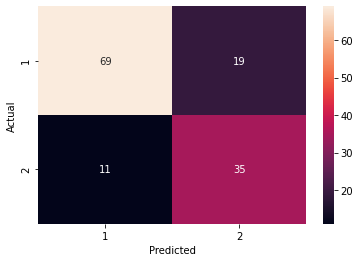

In [60]:
confusion_matrix = pd.crosstab(compare['y_Actual'], compare['y_Predict'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

# Finish